# Lab-07: Graph / Network

A graph/network data structure is a collection of nodes that have data and are connected to other nodes. In this lab, the terms "graph" and "network" are used interchangeably.


This lab uses materials from:
1. https://www.programiz.com/dsa/graph
2. https://medium.com/swlh/a-tutorial-on-networkx-network-analysis-in-python-part-i-43c1d35830b6
3. https://networkx.org/documentation/stable/tutorial.html
4. https://www.geeksforgeeks.org/graph-and-its-representations/
5. https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7
6. https://lordgrilo.github.io/complexity-book/2-networkx/nb04_powerlaw_fitting.html#

## Goals

This lab aims to answer the following questions:

- What is a Graph, and what makes it special from other type of data collections?
- What are some definitions and properties for Graphs?
- How can we use different visualizations/presentations to help us better understand/extract information from Graphs?

We will cover some fundamental concepts of graph data including:
1. Graph basics
2. Visualization
3. Centrality

And we will see how we use those methods on **Social Network** analysis.

Datasets used:
1. [Small] Zachary’s Karate Club [https://en.wikipedia.org/wiki/Zachary%27s_karate_club]
2. [Real-World Scale] covid19-tweets [https://www.kaggle.com/datasets/gpreda/covid19-tweets]

# Networkx

In this section we will learn about the NetworkX package of Python. NetworkX stands for network analysis in Python. It is mainly used for creating, manipulating, and study complex graphs.

## Installation and Imports

If the NetworkX package is not installed in your system, you have to install it at first. You can use the following command:

```
pip install networkx
```

Since Colab have Networkx installed for us by default. We can just import it directly here.

In [126]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Creating a graph

Create an empty graph with no nodes and no edges.


In [127]:
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any [hashable](https://docs.python.org/3/glossary.html#term-hashable) object e.g., a text string, an image, an XML object,
another Graph, a customized node object, etc.

## Nodes

The graph `G` can be grown in several ways.  NetworkX includes many
graph generator functions and
facilities to read and write graphs in many formats.
To get started though we’ll look at simple manipulations.  You can add one node
at a time,

In [128]:
G.add_node("A")

The above command will add a single node A in the graph G. If we want to add multiple nodes at once, then we can use the following command to add nodes from any [iterable](https://docs.python.org/3/glossary.html#term-iterable) container, such as a list:

In [129]:
G.add_nodes_from(["B","C","D","E"])

The above command will add four vertices (or, nodes) in graph G. Now, graph G has five vertices A, B, C, D, and E. These are just isolated vertices because we have not added any edges to the graph G.

\* You can also add nodes along with node
attributes if your container yields 2-tuples of the form
`(node, node_attribute_dict)`:

```
>>> G.add_nodes_from([
...     ("A", {"color": "red"}),
...     ("B", {"color": "green"}),
... ])
```

Node attributes are discussed further below.

## Edges

`G` can also be grown by adding one edge at a time,

In [130]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

In [131]:
G.add_edges_from([(1, 2), (1, 3)])

\* or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further
below.

There are no complaints when adding existing nodes or edges. For example,
after removing all nodes and edges,

In [132]:
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are
already present.

In [133]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)             # add node "1",
# NOTE that the 1 here is just the node label, it has nothing to do with this node's position/index in the graph, in fact, nodes do not have orders in graphs
G.add_edge(1, 2)          # if we haven't added nodes 1 and 2, this one line will automatically add nodes 1 and 2 into our graph
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # Note this string "spam" will be treated as a list of chars here, therefore this adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

# Think: how many nodes and egdes are there in this Graph?

At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

In [134]:
list(G.nodes())

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [135]:
print("Number of nodes:", G.number_of_nodes(), ", they are:", G.nodes())
print("Number of edges:", G.number_of_edges(), ", they are:", G.edges())

Number of nodes: 8 , they are: [1, 2, 3, 'spam', 's', 'p', 'a', 'm']
Number of edges: 3 , they are: [(1, 2), (1, 3), (3, 'm')]


We can even construct graph from other graphs

## Graph Terminology

1. **Directed Graph**: A graph in which an edge (u,v) doesn't necessarily mean that there is an edge (v, u) as well. The edges in such a graph are represented by arrows to show the direction of the edge.
2. **Undirected Graph**: Undirected graphs have edges that do not have a direction. The edges indicate a two-way relationship, in that each edge can be traversed in both directions.
3. **Adjacency**: A vertex is said to be adjacent to another vertex if there is an edge connecting them.
4. **Path**: A sequence of edges that allows you to go from vertex A to vertex B is called a path.
5. **Adjacency Matrix**: An adjacency matrix is a 2D array of V x V nodes(vertices). Each row and column represent a node(vertex). If the value of any element $a_{ij}$ is 1, it represents that there is an edge connecting vertex $i$ and vertex $j$.
6. **Degree**: the degree (or valency) of a node(vertex) of a graph is the number of edges that are connected(incident) to the node(vertex).

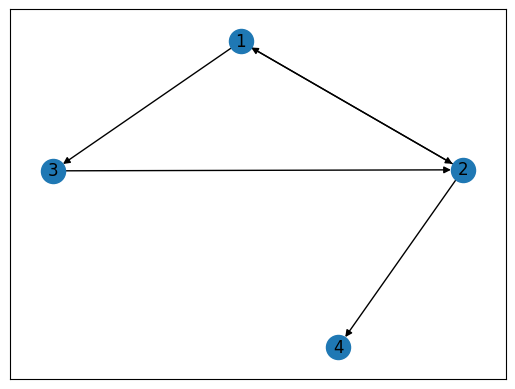

In [136]:
# DiGraph stands for Directed-Graph
Directed_G = nx.DiGraph()
Directed_G.add_edge(1, 2)   # adds the nodes in order 1, 2, notice this is different from the previous edge
Directed_G.add_edge(2, 1)   # adds the nodes in order 2, 1
Directed_G.add_edge(1, 3)
Directed_G.add_edge(3, 2)
Directed_G.add_edge(2, 4)

# Default way to draw the Graph
nx.draw_networkx(Directed_G)

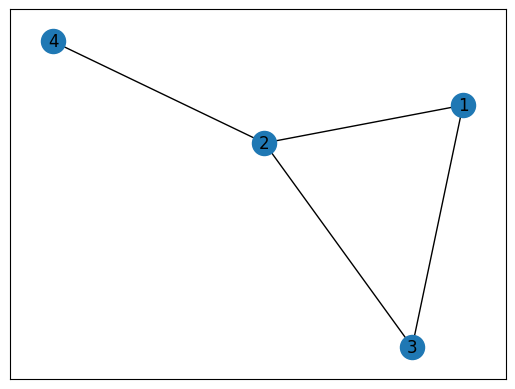

In [137]:
# This cast the Directed Graph to Undirected Graph
Undirected_G = Directed_G.to_undirected()

# Default way to draw the Graph
nx.draw_networkx(Undirected_G)


## Examining elements of a graph in NetworkX

In NetworkX, four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are set-like views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure. They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data()`.
If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [138]:
Undirected_G.nodes # This gives us a NodeView(..)

NodeView((1, 2, 3, 4))

In [139]:
print(list(Directed_G.nodes))
print(list(Directed_G.edges))

print(list(Undirected_G.nodes)) # Usually we cast nodes to list
print(list(Undirected_G.edges)) # Notice that (1,2) and (2,1) are merged into just (1,2) in the undirected graph

[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 1), (2, 4), (3, 2)]
[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 4), (2, 3)]


In [140]:
nx.to_pandas_adjacency(Directed_G, dtype=int)# This gives us the adjacency matrix (in the dense form)
# Rows are node_from, Columns are node_to

1  2  3  4
1  0  1  1  0
2  1  0  0  1
3  0  1  0  0
4  0  0  0  0

In [141]:
nx.to_pandas_adjacency(Undirected_G, dtype=int)
# The adjacency matrix for a undirect graph is always diagonal, why?

1  2  3  4
1  0  1  1  0
2  1  0  1  1
3  1  1  0  0
4  0  1  0  0

In [142]:
Undirected_G.degree

DegreeView({1: 2, 2: 3, 3: 2, 4: 1})

In [143]:
print(Undirected_G.degree[2])  # the number of edges incident to node 2

3


## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

### Graph attributes

Assign graph attributes when creating a new graph

In [144]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [145]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### Node attributes

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`

In [146]:
G.add_node(1, time='5pm')
# Every node in the list will share this attribute time='2pm'
G.add_nodes_from([3,4], time='2pm')
# What if I want specific attribute for each node? You add from a list of tuples: (node_name, node_attr_dict)
G.add_nodes_from([(5,{'time':'10pm'}),(6,{'time':'7pm'})])
# Attribute for node 1 is accessible just like a dictionary
G.nodes[1]

{'time': '5pm'}

In [147]:
# And you can add/edit it
G.nodes[1]['room'] = 714
# Get a presentation for all nodes with all attribution
G.nodes(data=True)

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}, 4: {'time': '2pm'}, 5: {'time': '10pm'}, 6: {'time': '7pm'}})

In [148]:
# Get a dictionary for specific node attribute
nx.get_node_attributes(G, "time")

{1: '5pm', 3: '2pm', 4: '2pm', 5: '10pm', 6: '7pm'}

### Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

The special attribute weight should be numeric as it is used by algorithms requiring weighted edges.

In [149]:
G = nx.Graph()
G.add_edge(1, 2, weight=4.7 )
# Every edge in the list will share this attribute color='red'
G.add_edges_from([(3, 4), (4, 5)], color='red')
# Again, when you want to add them seperately
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
# Edit
G[1][2]['weight'] = 4.7
# Another way to edit
G.edges[3, 4]['weight'] = 4.2
G.edges[4, 5]['weight'] = 8.8

In [150]:
# Get the edge attribute
G.get_edge_data(3, 4)

{'color': 'red', 'weight': 4.2}

In [151]:
# Get a dictionary for specific edge attribute
nx.get_edge_attributes(G, "weight")

{(1, 2): 4.7, (2, 3): 8, (3, 4): 4.2, (4, 5): 8.8}

In [152]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red', 'weight': 4.2}), (4, 5, {'color': 'red', 'weight': 8.8})])

In [153]:
# Sort by weights
sorted(G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)

[(4, 5, {'color': 'red', 'weight': 8.8}),
 (2, 3, {'weight': 8}),
 (1, 2, {'weight': 4.7, 'color': 'blue'}),
 (3, 4, {'color': 'red', 'weight': 4.2})]

# Social Network

Let's try to understand this through an example. Social network can be easily parsed into graphs. On facebook, everything is a node. That includes User, Photo, Album, Event, Group, Page, Comment, Story, Video, Link, Note...anything that has data is a node.

Every relationship is an edge from one node to another. Whether you post a photo, join a group, like a page, etc., a new edge is created for that relationship.

In this lab, we'll explore key graph theory concepts using a concise social network dataset. ( And it has a storyline )

## Zachary’s Karate Club

Zachary W. (1977). An information flow model for conflict and fission in small groups. Journal of Anthropological Research, 33, 452-473.

**Story**

From 1970-1972, Wayne W. Zachary observed a karate club split into two factions, those that supported the Club President, referred to as “Officer” and those that supported one of the instructors, referred to as “Mr. Hi.” Eventually, the two factions formally split into two clubs.

This frequently-used dataset contains 34 club members (nodes) and a record of who socialized with whom outside of the class (edges) right before the formal split of the club.

In [154]:
# Lucky for us, this is built-in in Networkx
G = nx.karate_club_graph()
# Spoiler: "Mr. Hi" is node 0, "Officer" is node 33, "Officer" is also known as "John A," in literatures
# "club" attribute indicates the post-club each member belongs to
list(G.nodes(data=True))[:5]

[(0, {'club': 'Mr. Hi'}),
 (1, {'club': 'Mr. Hi'}),
 (2, {'club': 'Mr. Hi'}),
 (3, {'club': 'Mr. Hi'}),
 (4, {'club': 'Mr. Hi'})]

In [155]:
# The weight describes how strong the connection is between two members
list(G.edges(data=True))[:5]

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 5}),
 (0, 3, {'weight': 3}),
 (0, 4, {'weight': 3}),
 (0, 5, {'weight': 3})]

# Visualization

Visualizing graphs is often a great way to see and understand information.

You probably notice that in the direct and un-direct graphs section, although the un-direct graph is derived from the directed graph, those two plot differs a lot from each other, why?

It turns out unless there is some "ground truth" way to lay out nodes (meaning each node has an associated coordinate), we must choose some way to place nodes in our visualization.  

There are a variety of methods for this, and we will introduce Layouts in this lab.


Materials used: https://geomdata.gitlab.io/hiveplotlib/karate_club.html

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the networkx.drawing
module and will be imported if possible.

First import Matplotlib’s plot interface if you haven't (pylab works too)

In [156]:
import matplotlib.pyplot as plt

In [157]:
from matplotlib.lines import Line2D

# Define some visualization aids

# color the nodes by faction
# This color list will be passed to the draw function: color[i] -> nodes[i]'s color
color = []
for node in G.nodes():
    # Bosses
    if node==0:
        color.append("C0")
    elif node==33:
        color.append("C1")
    else:
      # Members
      if G.nodes.data()[node]["club"] == "Mr. Hi":
          color.append("C2")
      else:
          color.append("C3")

# Set Different Marker and Legend for the two bosses
mr_hi_legend = Line2D(
    [],
    [],
    markerfacecolor="C0",
    markeredgecolor="C0",
    marker="o",
    linestyle="None",
    markersize=14,
)

officer_legend = Line2D(
    [],
    [],
    markerfacecolor="C1",
    markeredgecolor="C1",
    marker="o",
    linestyle="None",
    markersize=14,
)

# Set Different Marker and Legend for the two club members
mr_hi_club_legend = Line2D(
    [],
    [],
    markerfacecolor="C2",
    markeredgecolor="C2",
    marker="o",
    linestyle="None",
    markersize=8,
)

officer_club_legend = Line2D(
    [],
    [],
    markerfacecolor="C3", # Set color
    markeredgecolor="C3",
    marker="o",
    linestyle="None",
    markersize=8,
)

### Layouts

There are several layout methods you might use, which are good for certain applications.

**Spectral Embeddings** are good for partitioning the graph into clusters.

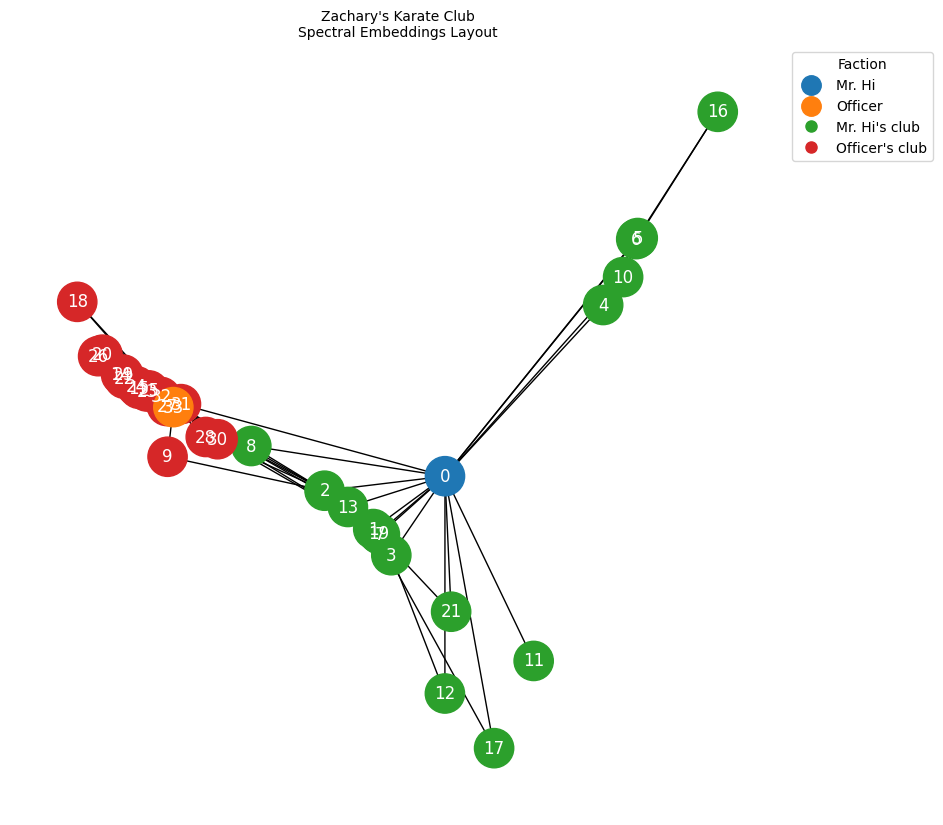

In [158]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.legend(
    [mr_hi_legend, officer_legend, mr_hi_club_legend, officer_club_legend],
    ["Mr. Hi","Officer","Mr. Hi's club", "Officer's club"],
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title="Faction",
)

ax.set_title("Zachary's Karate Club\nSpectral Embeddings Layout", fontsize=10)
nx.draw_spectral(
    G, with_labels=True, node_color=color, ax=ax, font_color="white", node_size=800
)
plt.show()

**Spring layouts** tend to do a good job of separating nodes, which can be nice for visualization

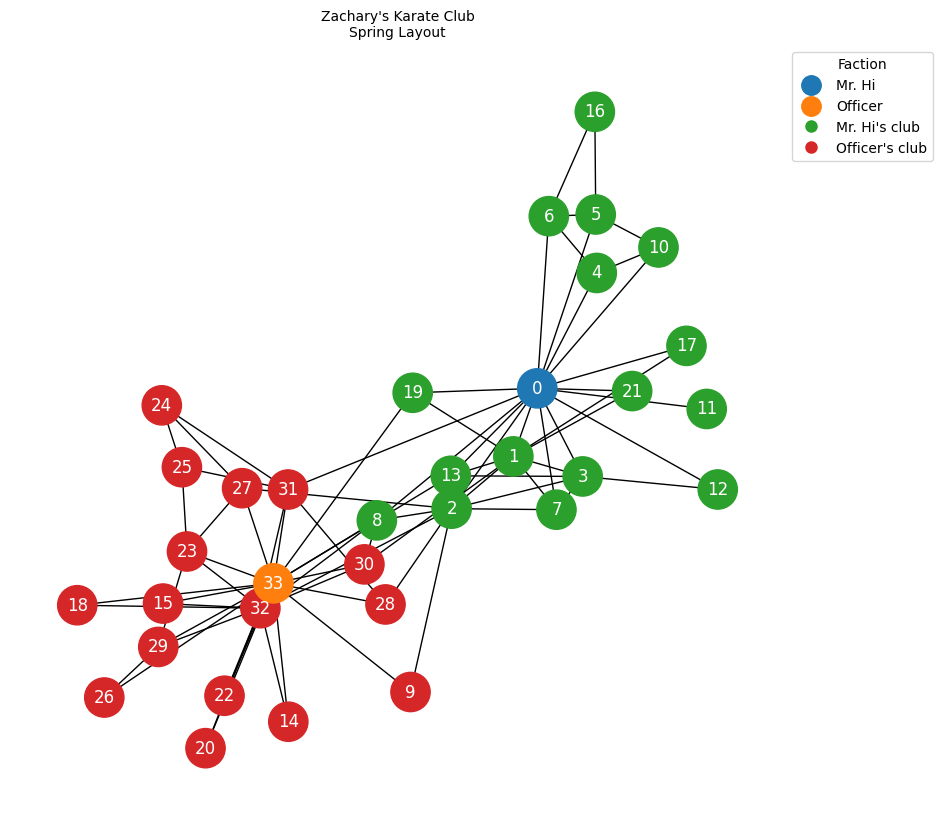

In [159]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.legend(
    [mr_hi_legend, officer_legend, mr_hi_club_legend, officer_club_legend],
    ["Mr. Hi","Officer","Mr. Hi's club", "Officer's club"],
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title="Faction",
)

ax.set_title("Zachary's Karate Club\nSpring Layout", fontsize=10)
nx.draw_spring(
    G, with_labels=True, node_color=color, ax=ax, font_color="white", node_size=800
)
plt.show()

the [Kamada-Kawai algorithm](https://www-sciencedirect-com.proxy.uchicago.edu/science/article/pii/0020019089901026?via%3Dihub) also gives visually pleasing results.

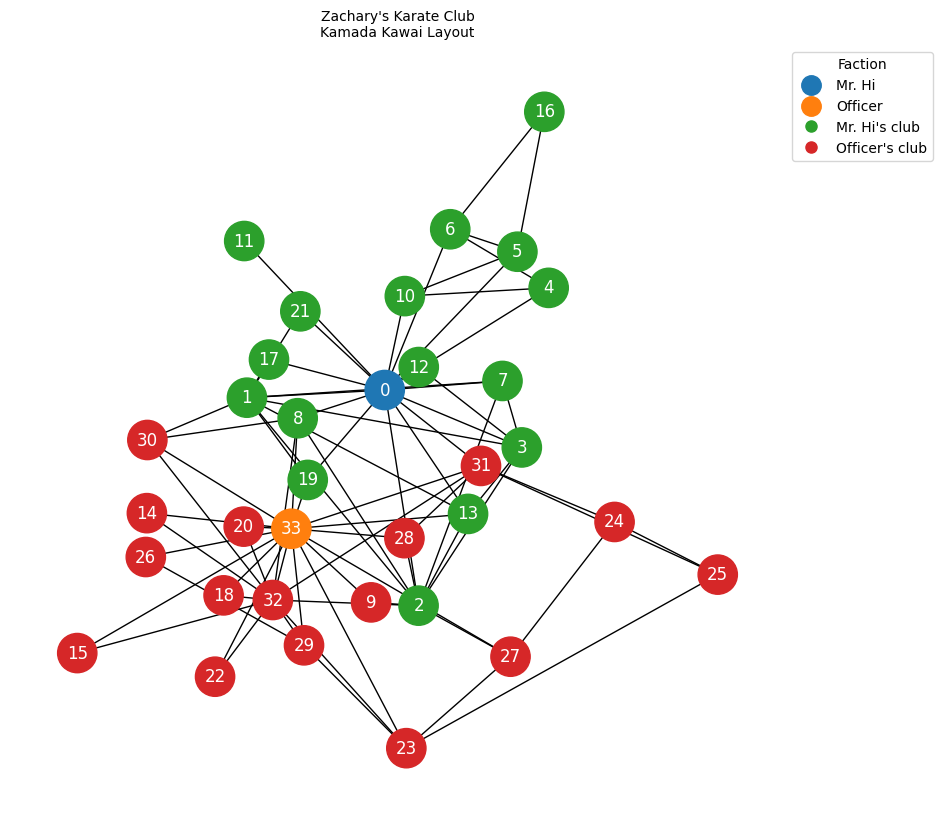

In [160]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.legend(
    [mr_hi_legend, officer_legend, mr_hi_club_legend, officer_club_legend],
    ["Mr. Hi","Officer","Mr. Hi's club", "Officer's club"],
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title="Faction",
)

ax.set_title("Zachary's Karate Club\nKamada Kawai Layout", fontsize=10)
nx.draw_kamada_kawai(
    G, with_labels=True, node_color=color, ax=ax, font_color="white", node_size=800
)
plt.show()

**Circular layouts** ususally gives us a better visualization on edges and degree of nodes

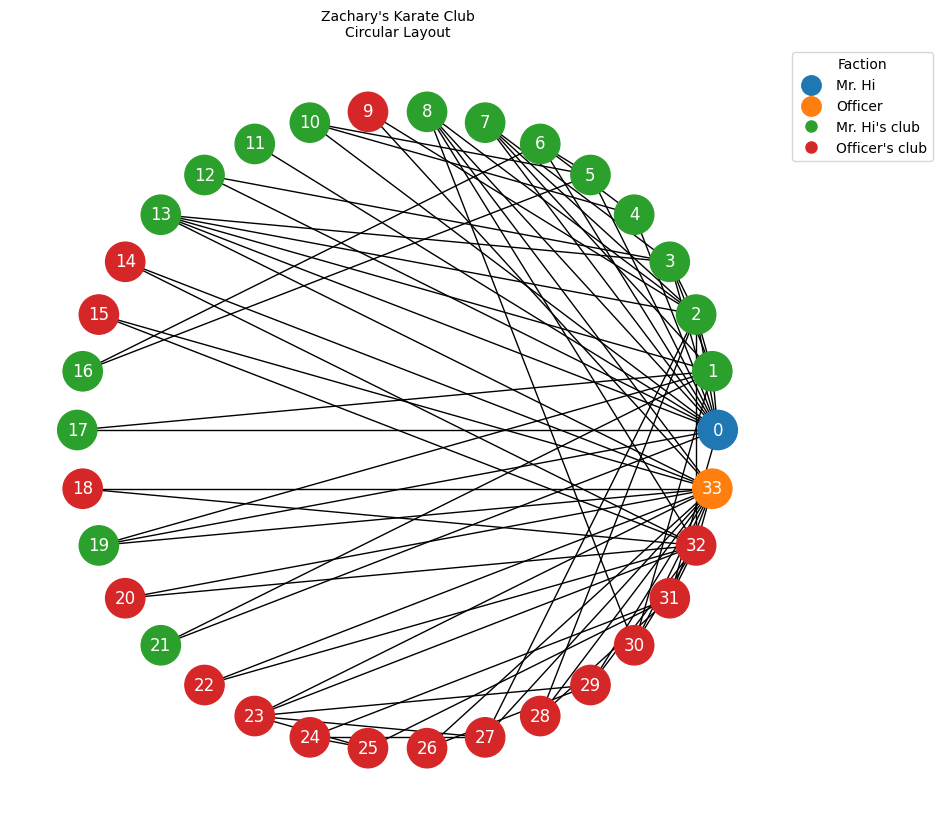

In [161]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.legend(
    [mr_hi_legend, officer_legend, mr_hi_club_legend, officer_club_legend],
    ["Mr. Hi","Officer","Mr. Hi's club", "Officer's club"],
    loc="upper left",
    bbox_to_anchor=(1, 1),
    title="Faction",
)

ax.set_title("Zachary's Karate Club\nCircular Layout", fontsize=10)
nx.draw_circular(
    G, with_labels=True, node_color=color, ax=ax, font_color="white", node_size=800
)
plt.show()

Note that those layout methods are nothing but a mapping function of nodes -> coordinate positions.

In [162]:
pos=nx.spring_layout(G)
list(pos.items())[:5]

[(0, array([-0.3611471 ,  0.34792852])),
 (1, array([-0.34603584,  0.04749071])),
 (2, array([-0.0721608 ,  0.02850793])),
 (3, array([-0.43715757,  0.18951443])),
 (4, array([-0.44326974,  0.76365965]))]



Other than those, you can find more layouts and examples here:
1. https://networkx.org/documentation/stable/reference/drawing.html
2. https://networkx.org/documentation/stable/auto_examples/index.html

### Edge Labels



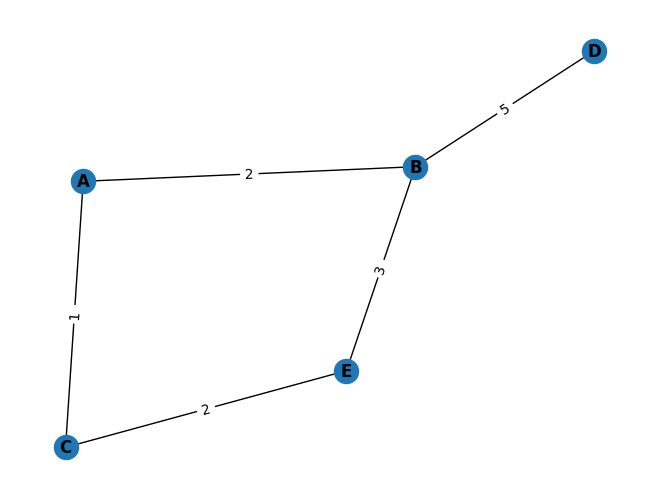

In [163]:
G = nx.Graph()
# Default attribute for edge = weight
E = [("A", "B", 2), ("A", "C", 1), ("B", "D", 5), ("B", "E", 3), ("C", "E", 2)]
G.add_weighted_edges_from(E)
edge_weight = nx.get_edge_attributes(G,"weight")
# This gives us position w.r.t a certain layout, we will introduce this in the next section
pos=nx.spring_layout(G)
# Draw the nodes and edges, with node labels: with_labels=True, and set that font to bold
nx.draw(G, pos, with_labels=True, font_weight="bold")
# We also draw the edge weights as edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

# Centrality

Those visualizations are nice, but if I hide the spoiler of node 0 being "Mr Hi" and node 33 being "Officer", can you tell who are our main characters here in this social network?

Highly central nodes usually play a key role of a network, serving as hubs for different network dynamics. However the definition and importance of centrality might differ from case to case, and may refer to different centrality measures:

**Degree** — the amount of neighbors of the node

**PageRank** — iterative circles of neighbors

**Closeness** — the level of closeness to all of the nodes

**Betweenness** — the amount of short path going through the node


In [164]:
# Let's switch back to the karate club dataset
G = nx.karate_club_graph()

In [165]:
# Helper function to draw a graph that node size and color are proportional to the centrality_measure
def draw_centrality(G: nx.Graph, centrality_measure: dict, node_scale: float):
    """
    G: the graph to draw
    centrality_measure: your centrality_measure returned from nx.centrality_measures
    node_scale: the scale of the node size
    """
    fig, ax = plt.subplots(figsize=(12, 10))

    # centrality, cast it to a np.array of floats
    centrality = np.fromiter(centrality_measure.values(), float)

    # plot
    # you choice of layout here, as we see from the Layouts session, spring layout might be the most suitable for this Graph
    # here we fixed the random seed, so the positions are consistent thru multiple runs
    pos = nx.spring_layout(G, seed=42)
    # node_color=centrality and cmap=plt.cm.copper will map the centrality to a linear colorspace
    # you can learn to pick the colormap you like, or customize a colormap here https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps
    # node_size=centrality*node_scale will scale the node_size w.r.t. the centrality
    nx.draw(G, pos, ax=ax, node_color=centrality, node_size=centrality*node_scale, cmap=plt.cm.copper)
    # we also draw the node labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_color="white")
    # Place a colorbar
    sub_ax = fig.add_axes([0.95, 0.13, 0.01, 0.09])
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.copper),sub_ax)
    plt.show()

## Degree

The degree centrality for a node v is the fraction of nodes it is connected to.

The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G. Range of degree centrality is [0,1].

In [166]:
deg_centrality = nx.degree_centrality(G)
list(deg_centrality.items())[:5]

[(0, 0.48484848484848486),
 (1, 0.2727272727272727),
 (2, 0.30303030303030304),
 (3, 0.18181818181818182),
 (4, 0.09090909090909091)]

<BarContainer object of 34 artists>

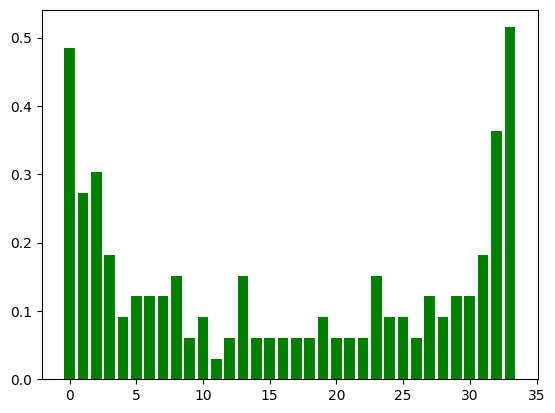

In [167]:
plt.bar(deg_centrality.keys(), deg_centrality.values(), color='g')

In [168]:
# Top-5 nodes
sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)[0:5]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727)]

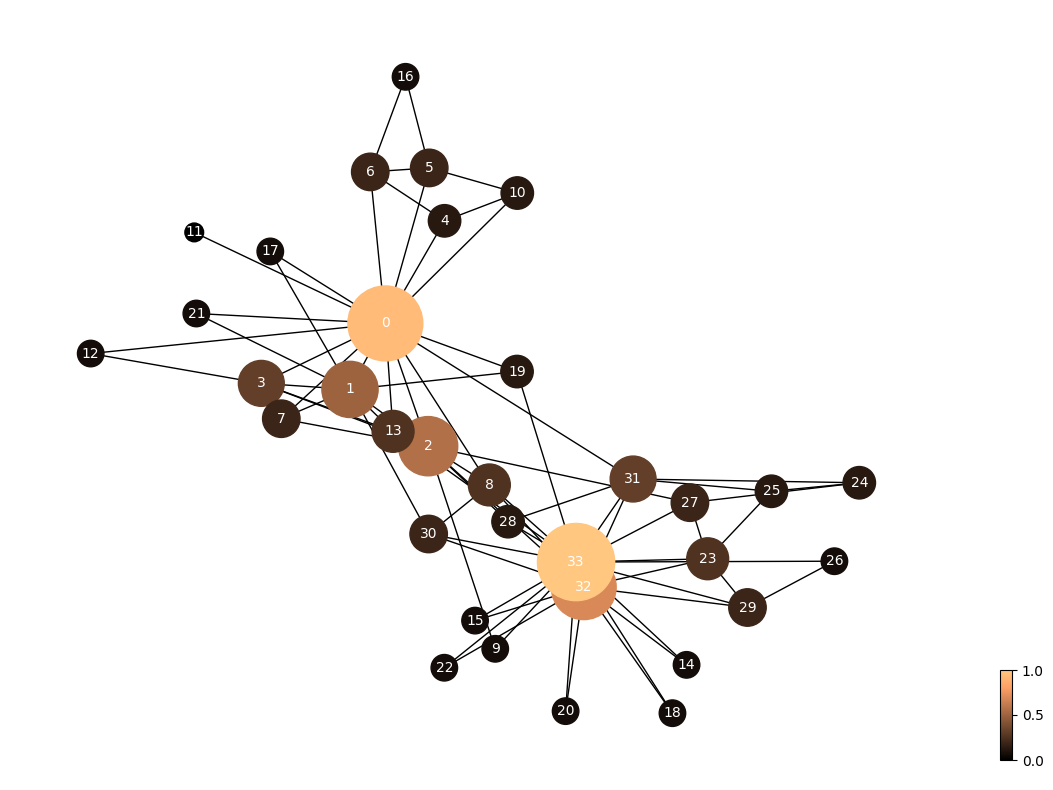

In [169]:
draw_centrality(G, deg_centrality, node_scale=6e3)
# Node 0 = Mr. Hi
# Node 33 = Officer

## PageRank

PageRank, introduced by Lary Page, is(was) the cornerstone of Google, determining the ranking of webpages in search results.

You will learn the math part in the lecture, if not here's a useful link for people that are interested. (https://towardsdatascience.com/pagerank-algorithm-fully-explained-dc794184b4af)

In this lab, you only need to know how to use the pre-built function. The centrality here is called PageRank score, which reflects the importance of a node in a network.

A higher PageRank score represents influential nodes who can spread their content to a community much faster compared to nodes with lower PageRank score.

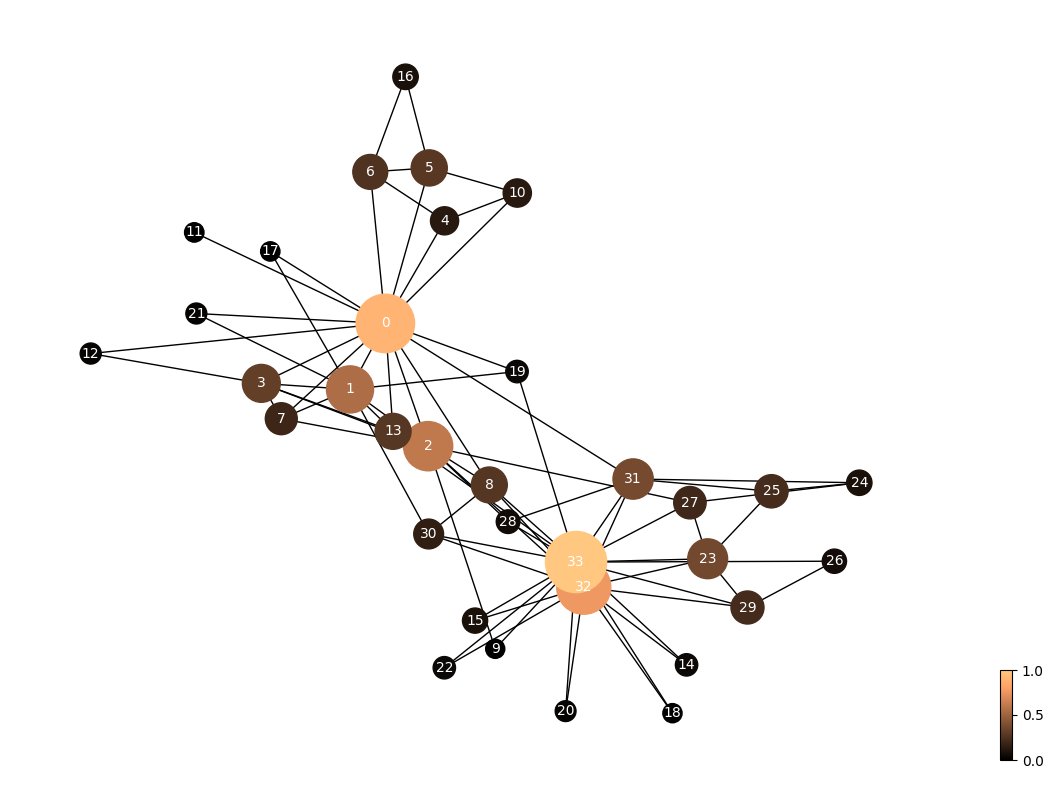

In [170]:
pr_centrality = nx.pagerank(G)
draw_centrality(G, pr_centrality, node_scale=2e4)

# Node 0 = Mr. Hi
# Node 33 = Officer

## Closeness

Closeness centrality of a node $u$ is the reciprocal of the average shortest path distance to $u$ over all $n-1$ reachable nodes.

$$ C(u) = \frac{n-1}{\sum^{n-1}_{v=1} d(v, u) }$$

Where $d(v, u)$ is the shortest-path distance between $v$ and $u$, and $n-1$ is the number of nodes reachable from $u$.

Notice that the closeness distance function computes the incoming distance to $u$ for directed graphs. To use outward distance, act on G.reverse().

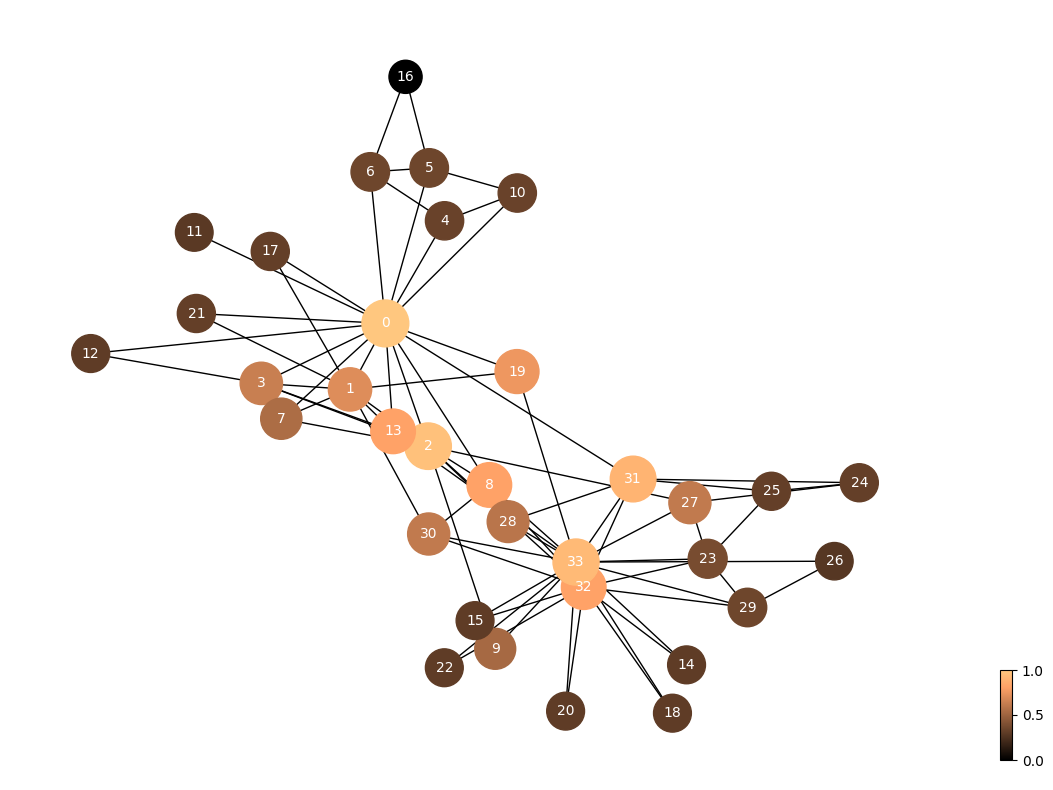

In [171]:
cl_centrality = nx.closeness_centrality(G)
draw_centrality(G, cl_centrality, node_scale=2e3)

# Node 0 = Mr. Hi
# Node 33 = Officer

## Betweenness

Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that **pass through** $v$.


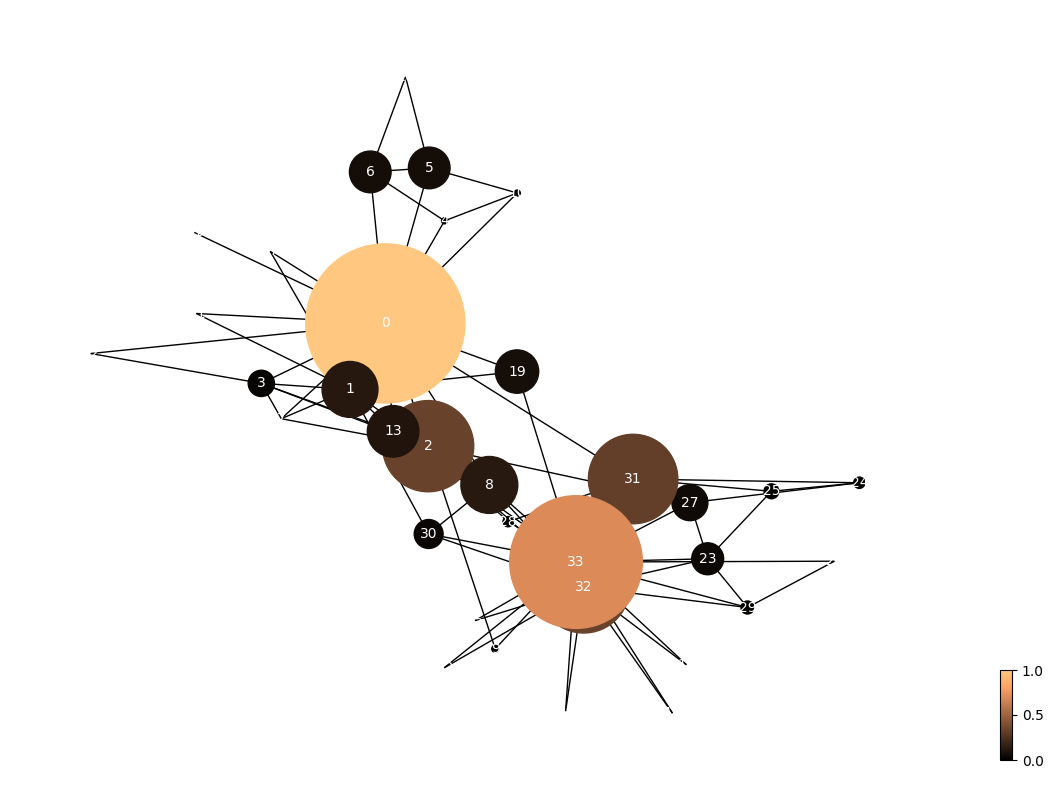

In [172]:
betw_centrality = nx.betweenness_centrality(G)
draw_centrality(G, betw_centrality, node_scale=3e4)

# Node 0 = Mr. Hi
# Node 33 = Officer

See the below example for different centrality on one graph.

Source — Arroyo, D.. “Discovering Sets of Key Players in Social Networks.” Computational Social Network Analysis (2010)

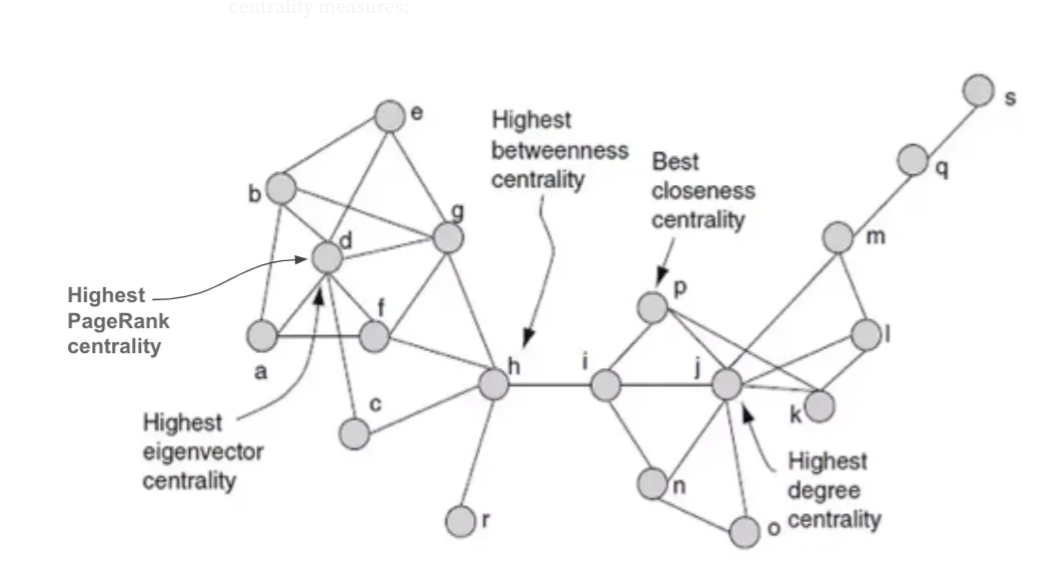

# Real-world-scale Social Network

Real-world networks and in particular social networks have a unique structure which often differs them from random mathematical networks:



**Small World phenomenon** claims that real networks often have very short paths (in terms of number of hops) between any connected network members. This applies for real and virtual social networks (the six handshakes theory) and for physical networks such as airports or electricity of web-traffic routings.

**Scale Free networks** with **power-law degree distribution** have a skewed population with a few highly-connected nodes (such as social-influences) and a lot of loosely-connected nodes.

**Homophily** is the tendency of individuals to associate and bond with similar others, which results in similar properties among neighbors.

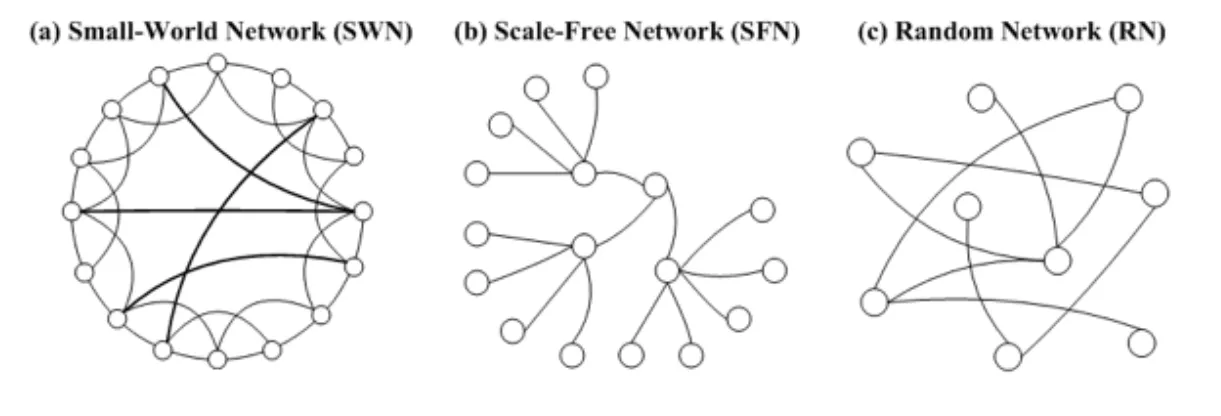

Source: Huang, Chung-Yuan et al. “Influence of Local Information on Social Simulations in Small-World Network Models.” J. Artif. Soc. Soc. Simul. 8 (2005)

## Covid19_tweets Dataset

**Context**

These tweets are collected using Twitter API and a Python script. A query for this high-frequency hashtag (#covid19) is run on a daily basis for a certain time period, to collect a larger number of tweets samples.

**Content**

The tweets have #covid19 hashtag. Collection started on 25/7/2020, with an initial 17k batch and will continue on a daily basis.

**Analysis**

As a datascientist, we can use this data to dive into the subjects that use this hashtag, look to the centrality distribution, evaluate sentiments, looks to trends etc.

WARNING: This real Twitter/X dataset contains offensive content.

Twitter is X now, btw.


In [173]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
import re

tweets_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/covid19_tweets.zip')
tweets_df

user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
...                                                   ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179105  ⚒️ The Architects of Free Trade ⚒️ Really Did ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...   

               user_created  user_followers  user_friends  user_favourites  \
0       2017-05-26 05:46:42             624           950            18775   
1       2009-04-16 20:06:23            2253          1677               24   
2       2009-02-28 18:57:41            9275          9525             7254   
3       2019-03-07 01:45:06             197           987             1488   
4       2017-02-12 06:45:15          101009           168              101   
...                     ...             ...           ...              ...   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179105  2016-07-13 17:21:59            1623          2160            98000   
179106  2009-10-27 17:43:13            1338          1111                0   
179107  2018-04-14 17:30:07              97          1697              566   

        user_verified                 date  \
0               False  2020-07-25 12:27:21   
1                True  2020-07-25 12:27:17   
2               False  2020-07-25 12:27:14   
3               False  2020-07-25 12:27:10   
4               False  2020-07-25 12:27:08   
...               ...                  ...   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179105          False  2020-08-29 19:44:15   
179106          False  2020-08-29 19:44:14   
179107          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                 hashtags               source  is_retweet  
0                                     NaN   Twitter for iPhone       False  
1                                     NaN  Twitter for Android       False  
2                             ['COVID19']  Twitter for Android       False  
3           

In [174]:
# We have the hashtags column in the dataset
# But if we need to generate hashtag column from raw tweets, we can do this
tweets_df['hashtags_if_gen'] = [ [f"'{e[1:]}'" for e in re.findall(r'#\w+', x)] if re.findall(r'#\w+', x) else np.nan for x in tweets_df['text']]

Let's see the hashtags

In [175]:
from pprint import pprint

def print_hashtags(tweets_df,top=100):
  allTweets = tweets_df["text"].str.cat(sep=' ')
  tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
  hashTags = [word for word in tweetWords if word.startswith("#")]
  hashTagsCounter = Counter(hashTags)
  pprint(hashTagsCounter.most_common(top))

print_hashtags(tweets_df, 40)

[('#covid19', 93929),
 ('#coronavirus', 9189),
 ('#covid19…', 3540),
 ('#pandemic', 1401),
 ('#india', 1032),
 ('#covid', 1021),
 ('#corona', 977),
 ('#trump', 903),
 ('#covid19?', 893),
 ('#lockdown', 876),
 ('#coronaviruspandemic', 846),
 ('#coronavirus…', 826),
 ('#covid_19', 747),
 ('#coronavirusupdate', 716),
 ('#wearamask', 707),
 ('#vaccine', 657),
 ('#odisha', 645),
 ('#indiafightscorona', 517),
 ('#breaking', 463),
 ('#coronavirusupdates', 449),
 ('#china', 445),
 ('#staysafe', 439),
 ('#usa', 432),
 ('#masks', 417),
 ('#coronainfoch', 405),
 ('#covidiots', 386),
 ('#health', 382),
 ('#us', 376),
 ('#mask', 367),
 ('#socialdistancing', 366),
 ('#russia', 356),
 ('#blood', 351),
 ('#uk', 350),
 ('#covidー19', 345),
 ('#hydroxychloroquine', 310),
 ('#quarantine', 280),
 ('#healthcare', 280),
 ('#auspol', 278),
 ('#trumpvirus', 275),
 ('#sarscov2', 274)]


In [176]:
# Let's pick a subset of those tweets by hashtag, say #trump
# More importantly this will gives us a graph with reasonable amount of nodes and edges to visualizae later

# Note this is a different count compare to previous output because we included all case-insensitive "#trump" cases
trumpTag = tweets_df[tweets_df["hashtags"].str.lower().str.contains("'trump'", na=False, regex=False)].copy()
trumpTag

user_name  \
234                                  BeautifulSkinYourIn   
437     Mx. Joe~Anthony Sierra Let us pray #COVID19 away   
473                                                   JB   
637                                         morteza_79ir   
1002                                    GrabEmBythePussy   
...                                                  ...   
178311                                    sixpinkoneblue   
178755                Fred Sparrow : Liar From The Shire   
178758                                       Dee Tallman   
178965                                       🦋  ROGUE  🦋   
179091                                       🦋  ROGUE  🦋   

                       user_location  \
234                              NaN   
437     #StGeorge~#StatenIsland~#NYC   
473                          Vermont   
637                              NaN   
1002                             NaN   
...                              ...   
178311                           NaN   
178755                           NaN   
178758       NC🌊 by way of WV⛰ (USA)   
178965                           NaN   
179091                           NaN   

                                         user_description  \
234     Daily Tips from our Nurses, Dietitians, Aesthe...   
437                                 Hope to be insightful   
473     R.N.-Retired. Wife to super smart & humble guy...   
637                                                   NaN   
1002    Former Republican Against #Trump\nIf you suppo...   
...                                                   ...   
178311  183K Americans dead b/c COVID19\nTrump is an e...   
178755                         Bystander, Savant, Pilgrim   
178758  *LifelongDiehardDEMOCRAT *IStandWithImmigrants...   
178965  May all aching hearts find their way there thr...   
179091  May all aching hearts find their way there thr...   

               user_created  user_followers  user_friends  user_favourites  \
234     2016-11-17 14:30:31            2401          3053               69   
437     2013-05-03 03:46:03             355           228             3685   
473     2013-09-23 13:12:29            3187          4722             9490   
637     2020-07-16 18:31:26               2             3                8   
1002    2020-05-05 22:13:04             464           410             1982   
...                     ...             ...           ...              ...   
178311  2011-06-30 04:46:30            3880          4281             7251   
178755  2011-09-21 10:16:40             512             2              341   
178758  2013-03-18 19:49:57           15435         15520           135734   
178965  2017-01-30 07:38:23             628           386            14845   
179091  2017-01-30 07:38:23             628           386            14845   

        user_verified                 date  \
234             False  2020-07-25 12:20:00   
437             False  2020-07-25 12:13:05   
473             False  2020-07-25 12:11:56   
637             False  2020-07-25 12:06:39   
1002            False  2020-07-25 11:58:42   
...               ...                  ...   
178311          False  2020-08-29 20:31:03   
178755          False  2020-08-29 20:02:49   
178758          False  2020-08-29 20:02:29   
178965          False  2020-08-29 19:52:37   
179091          False  2020-08-29 19:44:51   

                                                     text  \
234     WORLD #NEWS #TODAY SHORTENED FOR BUSY PEOPLE\n...   
437     #Hope #USA #Trump vilifying #USPS &amp; #Amazo...   
473     Oh for fvck’s sake @CNN @sarahcwestwood STOP W...   
637     The savior of humanity will come = Imam Zaman\...   
1002    Who's in for a #FBRParty ?\n\nIf you're a like...   
...                                                   ...   
178311  #Trump Bought Faulty Ventilators, Donated Func...   
178755  He's not well. Thoughts &amp; prayers for the ...   
178758  RNC coronavirus rhetoric clashes with the fact...   
178965  @wei

Think about how would you abstract a graph from this real-world data.


## Mention Graph

In Twitter, we use @user to mention other users, let's use this relation to build edges!

In [177]:
def addMentionedColumn(df):
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return uniqueNames

    df["mentioned"] = df["text"].apply(mentionsList)

addMentionedColumn(trumpTag)
trumpTag = trumpTag[["date","user_followers","user_name","text","mentioned"]]
trumpTag.head(100)

date  user_followers  \
234    2020-07-25 12:20:00            2401   
437    2020-07-25 12:13:05             355   
473    2020-07-25 12:11:56            3187   
637    2020-07-25 12:06:39               2   
1002   2020-07-25 11:58:42             464   
...                    ...             ...   
17442  2020-07-26 09:18:53               0   
17445  2020-07-26 09:18:40             375   
17539  2020-07-26 09:14:15            1611   
17776  2020-07-26 09:01:13              81   
18241  2020-07-26 08:37:07            1830   

                                              user_name  \
234                                 BeautifulSkinYourIn   
437    Mx. Joe~Anthony Sierra Let us pray #COVID19 away   
473                                                  JB   
637                                        morteza_79ir   
1002                                   GrabEmBythePussy   
...                                                 ...   
17442                                    Joshua Sandman   
17445                                             Stilt   
17539                                                AM   
17776                                        Tony Stark   
18241    Douglas Edwards↙️🚩🦺🌹🌻 mastodon.social/@dedicto   

                                                    text  \
234    WORLD #NEWS #TODAY SHORTENED FOR BUSY PEOPLE\n...   
437    #Hope #USA #Trump vilifying #USPS &amp; #Amazo...   
473    Oh for fvck’s sake @CNN @sarahcwestwood STOP W...   
637    The savior of humanity will come = Imam Zaman\...   
1002   Who's in for a #FBRParty ?\n\nIf you're a like...   
...                                                  ...   
17442  @Tristrial @ElijahSchaffer It's all political ...   
17445  The #Trump administration’s past actions weake...   
17539  1000/day dead. #Warzone #Trump #COVID19 https:...   
17776  @Lrihendry @realDonaldTrump I feel sorry for y...   
18241  Masks and vaccines won't protect me against #T...   

                            mentioned  
234                                []  
437                                []  
473    [foxnews, sarahcwestwood, cnn]  
637                                []  
1002                               []  
...                               ...  
17442     [tristrial, elijahschaffer]  
17445                              []  
17539                              []  
17776    [realdonaldtrump, lrihendry]  
18241                              []  

[100 rows x 5 columns]

In [178]:
def mentionGraph(df):
    g = nx.Graph()

    for (index, date,user_followers, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if mentionedUser in df['user_name']:
              print(mentionedUser)
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)

    return g

trumpGraph = mentionGraph(trumpTag)
print("# nodes:", len(trumpGraph.nodes()))
print("# edges:", len(trumpGraph.edges()))

# nodes: 605
# edges: 538


## Power law distribution

The degree distribution of a real social network can (usually) fit a power law distribution in this form:
$$ f(k) = c k^\alpha $$

Where $k$ is the degree of nodes, $c$ is a contant, and $\alpha $ is the law’s exponent.

Then we say "fit", means that we could find a $c$ and $\alpha $, such that $f(k)$ matches the probability(fraction) of nodes with degree=$k$ in the social network.

This indicates that the vast majority of nodes have very few connections, while a few important nodes (we call them Hubs, or essentially, big influencers) have a huge number of connections.



Draw the degree distribution

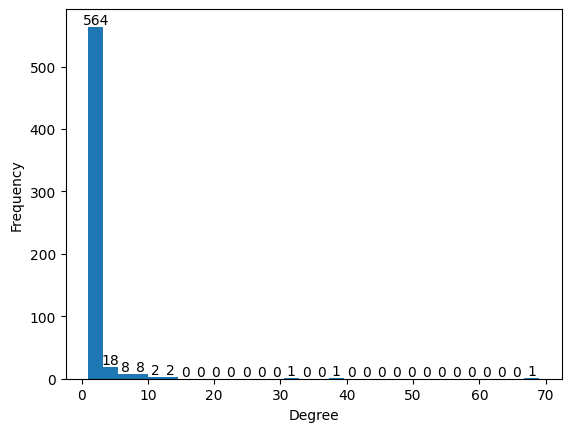

In [179]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    counts, edges, bars = plt.hist(degrees,bins=30)
    plt.bar_label(bars)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()


plot_degree_dist(trumpGraph)

Majority of the nodes have very small degree. A count of degrees reveals that of all the nodes,  564 have degree 1 or 2, 18 have degree 3 or 4. Only 1 node has degree somewhere close to 69 and which is the max degree found.

Now let's try to fit a power law distribution to this degree distribution

In [180]:
!pip -q install powerlaw

A **degree distribution** is the probability distribution of nodes' degrees over the whole network

In [181]:
# Our degree distribution for trumpGraph
deg=dict(trumpGraph.degree()).values()
deg_distri=Counter(deg)
deg_distri

# How to read this?
# This tells us that there are 19 nodes with degree 3, 386 nodes with degree 1 ...
# This is still count, let's convert it to probability

Counter({3: 26,
         1: 464,
         8: 5,
         69: 1,
         2: 74,
         6: 6,
         7: 2,
         12: 2,
         4: 11,
         5: 7,
         10: 1,
         9: 2,
         13: 2,
         32: 1,
         38: 1})

Text(0, 0.5, 'Linear Scale')

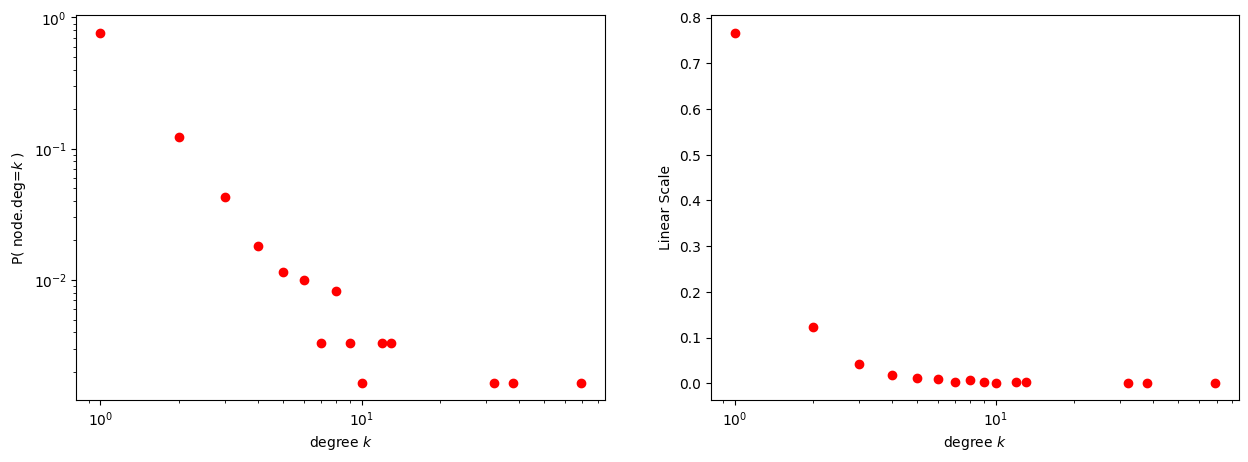

In [182]:
# Our degree distribution for trumpGraph
import powerlaw as pwl
x=[]
y=[]
for i in sorted(deg_distri):
    x.append(i)
    # Our y-axis is the probability, so we normalize our node count over total number of nodes
    y.append(deg_distri[i]/len(trumpGraph))

degree=list(deg)
pwl_distri=pwl.pdf(degree, bins=90)


fig, axs = plt.subplots(1, 2, sharex='all',figsize=(15,5))

axs[0].plot(x,y,'ro')
axs[1].plot(x,y,'ro')

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].set_yscale('linear')
axs[1].set_xscale('log')

axs[0].set_xlabel('degree $k$')
axs[1].set_xlabel('degree $k$')
axs[0].set_ylabel('P( node.deg=$k$ )')
axs[1].set_ylabel('Linear Scale')

Overall, the points in the log-log scatterplot tend to lie on a straight line suggesting that the network follows a power law trend. Additionally, in combination with the previous question's graph, we can see that there is a very prominent skewness in the count of degrees further emphasizing a power law behaviour

Fitted alpha: 1.9650452498318522
Fitted start from x: 1.1


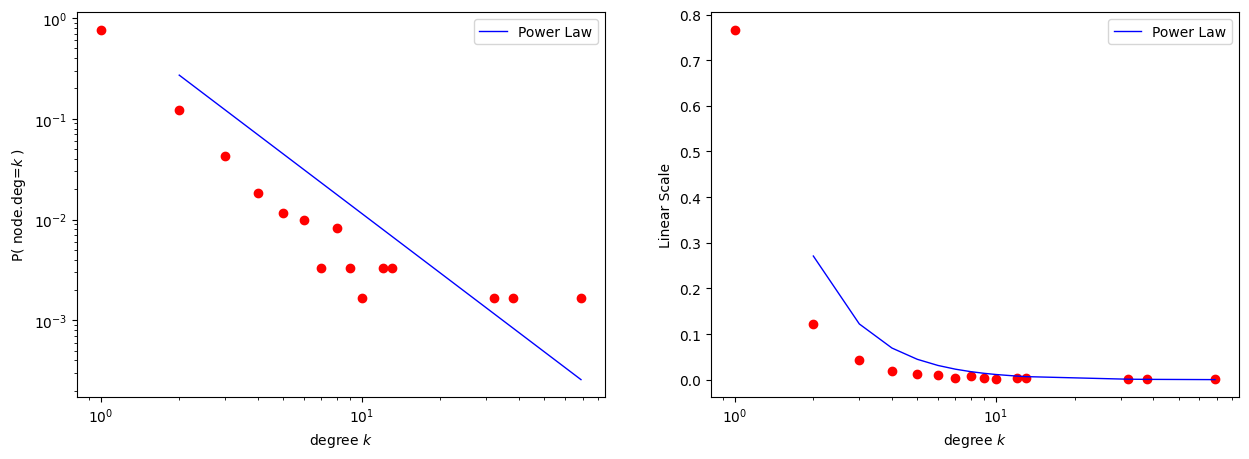

In [207]:
# Let's try to fit a power law distribution to this data

fit_function = pwl.Fit(degree, xmin=1.1)

print("Fitted alpha:", fit_function.power_law.alpha)
print("Fitted start from x:",fit_function.power_law.xmin)


fig, axs = plt.subplots(1, 2, sharex='all',figsize=(15,5))

axs[0].plot(x,y,'ro')
axs[1].plot(x,y,'ro')

fit_function.power_law.plot_pdf(ax=axs[0], color='b', linestyle='-', linewidth=1, label='Power Law')
fit_function.power_law.plot_pdf(ax=axs[1], color='b', linestyle='-', linewidth=1, label='Power Law')

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[1].set_yscale('linear')
axs[1].set_xscale('log')

axs[0].set_xlabel('degree $k$')
axs[1].set_xlabel('degree $k$')
axs[0].set_ylabel('P( node.deg=$k$ )')
axs[1].set_ylabel('Linear Scale')

axs[0].legend()
axs[1].legend()

The blue line is our Power Law distribution, with $\alpha \approx 1.965 $. We can see from the log-space and linear-space, that it roughly matches our data.

## Visualization (interactive)

In [184]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

import colorlover as cl
from IPython.display import HTML

HTML(cl.to_html( cl.scales['9'] ))

# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

def plotNetworkSizeColor(graph, Centr):
    maxCentr = max(Centr.values())
    minCentr = min(Centr.values())

    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines',
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = Centr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos],
                y=[yPos],
                text="User: %s <br> Closeness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers',
                marker=dict(
                    color=purd300[nodeColor],
                    size=nx.degree(graph,node)*2,
                    line=dict(width=2)))
        scatters.append(s)

    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph)
    nx.set_node_attributes(graph, name="pos", values=posDict)

Let's draw our TrumpGraph with a circular layout, with node size and color w.r.t its Closeness Centrality.

Quick question before we draw it, which Twitter user would be the largest node?

In [185]:
trumpGraph_visualized = trumpGraph.copy()
applyLayout(trumpGraph_visualized,nx.circular_layout)
configure_plotly_browser_state()
# Closeness
Centr = nx.closeness_centrality(trumpGraph_visualized)
plotNetworkSizeColor(trumpGraph_visualized, Centr)

Question: Who would be person with the highest centrality in all "#trump" tweets?

Answer: Trump himself

What about the other nodes? Who is Samuel Wilson?

In [186]:
trumpTag[ trumpTag['user_name'] == 'Samuel Wilson' ].head(10)

date  user_followers      user_name  \
117624  2020-08-13 10:45:35            2928  Samuel Wilson   
117730  2020-08-13 10:42:23            2928  Samuel Wilson   
117824  2020-08-13 10:39:04            2928  Samuel Wilson   
117863  2020-08-13 10:37:52            2928  Samuel Wilson   
117877  2020-08-13 10:37:28            2928  Samuel Wilson   
118256  2020-08-13 10:26:34            2928  Samuel Wilson   
118298  2020-08-13 10:25:30            2928  Samuel Wilson   
118333  2020-08-13 10:24:27            2928  Samuel Wilson   
118365  2020-08-13 10:23:18            2928  Samuel Wilson   
118398  2020-08-13 10:22:11            2928  Samuel Wilson   

                                                     text  \
117624  @EliStokols @PhilipRucker Today #Trump will sp...   
117730  @FauciFan Today #Trump will spend 𝗠𝗢𝗦𝗧 of his ...   
117824  @JoeBiden @KamalaHarris Today #Trump will spen...   
117863  @KamalaHarris @BarackObama @JoeBiden Today #Tr...   
117877  @BarackObama Today #Trump will spend 𝗠𝗢𝗦𝗧 of h...   
118256  @Acyn @MichaelSteele Today #Trump will spend 𝗠...   
118298  @ChrisJansing @WillieGeist @WhipClyburn @JoeBi...   
118333  @madrid_mike @ProjectLincoln Today #Trump will...   
118365  @JakeSherman Today #Trump will spend 𝗠𝗢𝗦𝗧 of h...   
118398  @BeschlossDC @morningmika Today #Trump will sp...   

                                                mentioned  
117624                         [philiprucker, elistokols]  
117730                                         [faucifan]  
117824                           [kamalaharris, joebiden]  
117863              [barackobama, kamalaharris, joebiden]  
117877                                      [barackobama]  
118256                              [michaelsteele, acyn]  
118298  [chrisjansing, williegeist, whipclyburn, msnbc...  
118333                      [madrid_mike, projectlincoln]  
118365                                      [jakesherman]  
118398                         [morningmika, beschlossdc]

In [187]:
trumpTag[ trumpTag['user_name'] == 'Samuel Wilson' ]['text'].tolist()[0]

'@EliStokols @PhilipRucker Today #Trump will spend 𝗠𝗢𝗦𝗧 of his time..\nGetting #Covid19 advice from Stella Immanuel… https://t.co/6rNZKNk9sn'

In [188]:
trumpTag[ trumpTag['user_name'] == 'Samuel Wilson' ]['text'].tolist()[1]

'@FauciFan Today #Trump will spend 𝗠𝗢𝗦𝗧 of his time..\nGetting #Covid19 advice from Stella Immanuel\n#Golfing \nOn… https://t.co/x5Qj4jxYHJ'

It seems "Samuel Wilson" is sending tweets with the same content but different @ mentions every 2~3 minutes.

This account is likely a spammer account, a bot. The contents behind those links e.g. [https://t.co/6rNZKNk9sn] are removed, possibly by X's new spammer detection.

In [189]:
trumpTag[ trumpTag['user_name'] == 'Malcolm Montgomery #WallOfVets' ].head(10)

date  user_followers                       user_name  \
84718  2020-08-08 13:38:00           84041  Malcolm Montgomery #WallOfVets   
84730  2020-08-08 13:37:38           84041  Malcolm Montgomery #WallOfVets   
85575  2020-08-08 13:09:14           84041  Malcolm Montgomery #WallOfVets   
85606  2020-08-08 13:08:20           84041  Malcolm Montgomery #WallOfVets   
86026  2020-08-08 12:59:45           84041  Malcolm Montgomery #WallOfVets   
86250  2020-08-08 12:53:03           84041  Malcolm Montgomery #WallOfVets   
86431  2020-08-08 12:46:50           84041  Malcolm Montgomery #WallOfVets   
86483  2020-08-08 12:45:10           84041  Malcolm Montgomery #WallOfVets   
86513  2020-08-08 12:44:40           84041  Malcolm Montgomery #WallOfVets   
86825  2020-08-08 12:33:19           84041  Malcolm Montgomery #WallOfVets   

                                                    text  \
84718  @Rev_on_the_left #FBR #FBRParty \nconsider we ...   
84730  @DevinsCowsDog #FBR #FBRParty \nconsider we ca...   
85575  @PdxMcSween #FBR consider we cannot rely upon ...   
85606  @yoksig @LtdMu11 #FBR consider we cannot rely ...   
86026  @RJDavisunicorns @RN00711 #FBR consider we can...   
86250  @secularcitizen2 #FBR consider we cannot rely ...   
86431  @whosrude We cannot rely upon #trump to #Prote...   
86483  @sillymickel We cannot rely upon #trump to #Pr...   
86513  @BaronReed4 We cannot rely upon #trump to #Pro...   
86825  @nevermore_007 @FlorenceGlatt @Ironhorse76 We ...   

                                         mentioned  
84718                            [rev_on_the_left]  
84730                              [devinscowsdog]  
85575                                 [pdxmcsween]  
85606                            [yoksig, ltdmu11]  
86026                   [rn00711, rjdavisunicorns]  
86250                            [secularcitizen2]  
86431                                   [whosrude]  
86483                                [sillymickel]  
86513                                 [baronreed4]  
86825  [florenceglatt, ironhorse76, nevermore_007]

In [190]:
trumpTag[ trumpTag['user_name'] == 'Malcolm Montgomery #WallOfVets' ]['text'].tolist()[0]

'@Rev_on_the_left #FBR #FBRParty \nconsider we cant rely upon #trump or #GOP to #ProtectOurKids or… https://t.co/E68uRLdpYF'

In [191]:
trumpTag[ trumpTag['user_name'] == 'Malcolm Montgomery #WallOfVets' ]['text'].tolist()[2]

'@PdxMcSween #FBR consider we cannot rely upon #trump or #GOP to #ProtectOurKids or #PortectOurTeachers from… https://t.co/mHNsbHaAyz'

The account "Malcolm Montgomery #WallOfVets" is still active.

Like 'Samuel Wilson', it looks like a spammer but hides it better. It has its own website, pages on GoFundMe and Indiegogo, and lots of followers. This account links to these well-known sites to seem more real and trustworthy.

This approach can be linked to what we've discussed today regarding PageRank. The account creates links ("edges") to reputable sources (like GoFundMe, Indiegogo, etc.) to boost its perceived authenticity and increase its "authentic centrality" score.

### Spammers insights (Optional)

It seems that tweet volume vs. time is a strong indicator of spammers. Recall the time-series contents, let's plot the hourly volumes for the two spammer accounts we caught.

<Axes: xlabel='date'>

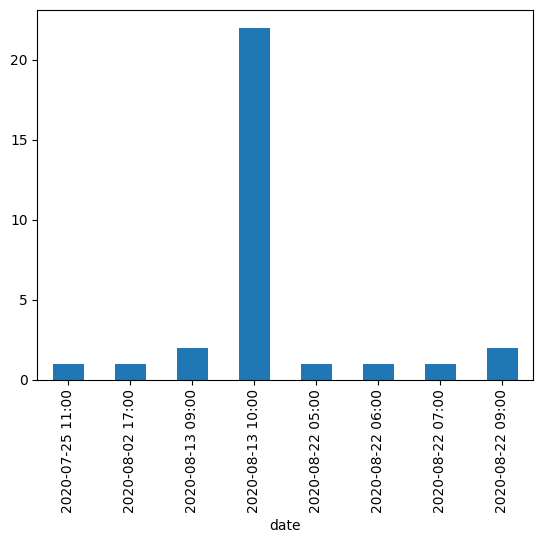

In [192]:
spammer1_df = tweets_df[ tweets_df['user_name'] == 'Samuel Wilson' ].copy()
spammer1_df["date"] = spammer1_df["date"].astype("datetime64")
spammer1_df["date"].groupby(spammer1_df["date"].dt.strftime('%Y-%m-%d %H:00')).count().plot(kind="bar")

<Axes: xlabel='date'>

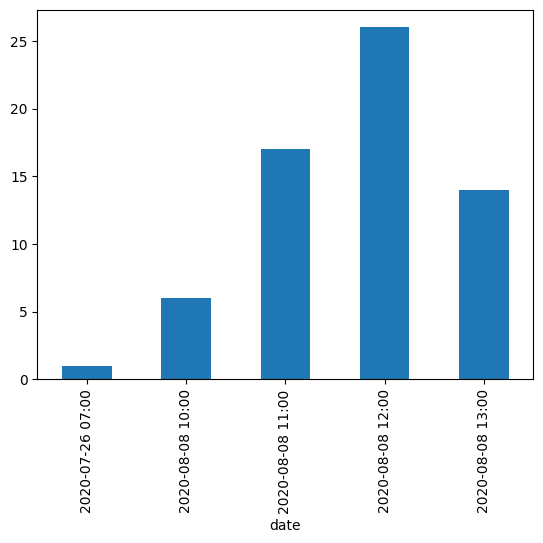

In [193]:
spammer2_df = tweets_df[ tweets_df['user_name'] == 'Malcolm Montgomery #WallOfVets' ].copy()
spammer2_df["date"] = spammer2_df["date"].astype("datetime64")
spammer2_df["date"].groupby(spammer2_df["date"].dt.strftime('%Y-%m-%d %H:00')).count().plot(kind="bar")

It seems a burst of more than 10~20 tweets per hour is a valid indicator of spam accounts. Let's list all the user_name in the original datasets that does this.

In [194]:
# set threshold
threshold=10

spammer_tweets_df = tweets_df.copy()
spammer_tweets_df["date"] = spammer_tweets_df["date"].astype("datetime64")
spammer_tweets_df["date_hour"] = spammer_tweets_df["date"].dt.strftime('%Y-%m-%d %H:00')
spammer_tweets_df_grp = spammer_tweets_df.groupby(["user_name","date_hour"]).size().to_frame(name='1hr_tweet_counts')
spammer_tweets_df_grp.reset_index(inplace=True)

spammer_tweets_df_grp[ spammer_tweets_df_grp["1hr_tweet_counts"] > threshold ].sort_values(by='1hr_tweet_counts', ascending=False)

user_name         date_hour  \
39909                       Dushyant Vachhani  2020-08-29 21:00   
39907                       Dushyant Vachhani  2020-08-14 03:00   
51370                      Grey Cross Studios  2020-08-14 02:00   
1990                               8min 46sec  2020-08-11 08:00   
39908                       Dushyant Vachhani  2020-08-14 04:00   
...                                       ...               ...   
95741                            PaSenateDems  2020-08-10 15:00   
29117                     Coronavirus Updates  2020-07-31 17:00   
100961  Proud Nana💜🇨🇦BC🇨🇦💜 PLEASE WEAR A MASK  2020-08-09 03:00   
105231                           Revue2presse  2020-08-16 08:00   
751      #ThereIsNoClimateEmergency Lensfocus  2020-07-31 17:00   

        1hr_tweet_counts  
39909                 61  
39907                 60  
51370                 41  
1990                  37  
39908                 37  
...                  ...  
95741                 11  
29117                 11  
100961                11  
105231                11  
751                   11  

[170 rows x 3 columns]

Now we can look into their tweets, check if they are spammers.

In [195]:
spammer_tweets_df[ (spammer_tweets_df['user_name'] == 'Dushyant Vachhani') & (spammer_tweets_df['date_hour'].str.contains('2020-08-29 21')) ]['text'].head(10).tolist()

["@fred_guttenberg Do in person #EarlyVoting (able &amp; willing) as it gets counted on Nov-3 EOD. e.g. #Wisconsin's earl… https://t.co/h8Dyq3hhq6",
 "@middleageriot Do in person #EarlyVoting (able &amp; willing) as it gets counted on Nov-3 EOD. e.g. #Colorado's early v… https://t.co/5lsXw7NlAH",
 "@TheDailyEdge @GOP Do in person #EarlyVoting (able &amp; willing) as it gets counted on Nov-3 EOD. e.g. #Arizona's earl… https://t.co/gF8fhgQFxs",
 "@fred_guttenberg @JoeBiden Do in person #EarlyVoting (able &amp; willing) as it gets counted on Nov-3 EOD. e.g. #Texas'… https://t.co/KF7YxSIVYl",
 "@fred_guttenberg @tedcruz Do in person #EarlyVoting (able &amp; willing) as it gets counted on Nov-3 EOD. e.g. #Texas's… https://t.co/RVBPvvz69h",
 "@axidentaliberal Do in person #EarlyVoting (able &amp; willing) as it gets counted on Nov-3 EOD. e.g. #Arizona's early… https://t.co/FjNl8apLVL",
 "@EthanBearman Do in person #EarlyVoting (able &amp; willing) as it gets counted on Nov-3 EOD. e.g. #Flori

Let's plot a mention graph of #trump excluding the spammer candidates

In [196]:
cleaned_trumpTag = trumpTag.copy()
cleaned_trumpTag = cleaned_trumpTag[~cleaned_trumpTag['user_name'].isin(spammer_tweets_df_grp[ spammer_tweets_df_grp["1hr_tweet_counts"] > threshold ]["user_name"])]
cleaned_trumpTag

date  user_followers  \
234     2020-07-25 12:20:00            2401   
437     2020-07-25 12:13:05             355   
473     2020-07-25 12:11:56            3187   
637     2020-07-25 12:06:39               2   
1002    2020-07-25 11:58:42             464   
...                     ...             ...   
178311  2020-08-29 20:31:03            3880   
178755  2020-08-29 20:02:49             512   
178758  2020-08-29 20:02:29           15435   
178965  2020-08-29 19:52:37             628   
179091  2020-08-29 19:44:51             628   

                                               user_name  \
234                                  BeautifulSkinYourIn   
437     Mx. Joe~Anthony Sierra Let us pray #COVID19 away   
473                                                   JB   
637                                         morteza_79ir   
1002                                    GrabEmBythePussy   
...                                                  ...   
178311                                    sixpinkoneblue   
178755                Fred Sparrow : Liar From The Shire   
178758                                       Dee Tallman   
178965                                       🦋  ROGUE  🦋   
179091                                       🦋  ROGUE  🦋   

                                                     text  \
234     WORLD #NEWS #TODAY SHORTENED FOR BUSY PEOPLE\n...   
437     #Hope #USA #Trump vilifying #USPS &amp; #Amazo...   
473     Oh for fvck’s sake @CNN @sarahcwestwood STOP W...   
637     The savior of humanity will come = Imam Zaman\...   
1002    Who's in for a #FBRParty ?\n\nIf you're a like...   
...                                                   ...   
178311  #Trump Bought Faulty Ventilators, Donated Func...   
178755  He's not well. Thoughts &amp; prayers for the ...   
178758  RNC coronavirus rhetoric clashes with the fact...   
178965  @weijia The Song!!!! So fitting for #Trump "Ra...   
179091  @dougmillsnyt @realDonaldTrump @FLOTUS "The #T...   

                                      mentioned  
234                                          []  
437                                          []  
473              [foxnews, sarahcwestwood, cnn]  
637                                          []  
1002                                         []  
...                                         ...  
178311                                       []  
178755                                       []  
178758                                       []  
178965                                 [weijia]  
179091  [dougmillsnyt, flotus, realdonaldtrump]  

[905 rows x 5 columns]

In [197]:
cleaned_trumpGraph = mentionGraph(cleaned_trumpTag)
cleaned_trumpGraph_visualized = cleaned_trumpGraph.copy()
applyLayout(cleaned_trumpGraph_visualized,nx.circular_layout)
configure_plotly_browser_state()
# Closeness
Centr = nx.closeness_centrality(cleaned_trumpGraph_visualized)
plotNetworkSizeColor(cleaned_trumpGraph_visualized, Centr)

Please note that this graph has been significantly smoothed, with the centrality being more distributed except for the primary topic.

How about a mention graph of #trump with just the spammer candidates

In [198]:
spammer_trumpTag = trumpTag.copy()
spammer_trumpTag = spammer_trumpTag[spammer_trumpTag['user_name'].isin(spammer_tweets_df_grp[ spammer_tweets_df_grp["1hr_tweet_counts"] > threshold ]["user_name"])]

spammer_trumpGraph = mentionGraph(spammer_trumpTag)
spammer_trumpGraph_visualized = spammer_trumpGraph.copy()
applyLayout(spammer_trumpGraph_visualized,nx.circular_layout)
configure_plotly_browser_state()
# Closeness
Centr = nx.closeness_centrality(spammer_trumpGraph_visualized)
plotNetworkSizeColor(spammer_trumpGraph_visualized, Centr)

It is observable that @realdonaldtrump has lost significance, even within his own hashtag. This reflects a common tactic employed by Twitter bots: they often hijack trending hashtags, incorporating them into their automatically generated spam tweets. Their goal is not necessarily to engage with Trump (thus no mentions), but rather to exploit popular trends.

In [199]:
# Here are the top hashtags for cleaned tweets
print_hashtags(cleaned_trumpTag, 30)

[('#trump', 749),
 ('#covid19', 489),
 ('#coronavirus', 77),
 ("#trump's", 60),
 ('#trump…', 40),
 ('#covid19…', 28),
 ('#usa', 25),
 ('#gop', 24),
 ('#news', 19),
 ('#trump’s', 19),
 ('#trumpvirus', 18),
 ('#covid', 18),
 ('#biden', 18),
 ('#maga', 17),
 ('#pandemic', 16),
 ('#potus', 13),
 ('#america', 12),
 ('#americans', 12),
 ('#china', 11),
 ('#politics', 10),
 ('#republican', 10),
 ('#trump2020', 10),
 ('#blm', 9),
 ('#democrats', 9),
 ('#2020', 8),
 ('#donaldtrump', 8),
 ('#tiktok', 7),
 ('#democrat', 7),
 ('#fauci', 7),
 ('#republicans', 7)]


In [200]:
# Here are the top hashtags for spammer tweets
print_hashtags(spammer_trumpTag, 30)

[('#trump', 154),
 ('#covid19', 94),
 ('#coronavirus', 88),
 ('#covid', 73),
 ('#biden', 70),
 ('#pandemic…', 34),
 ('#protectourkids', 23),
 ('#harris', 22),
 ('#trump…', 21),
 ('#plandemic', 21),
 ('#news', 21),
 ('#gop', 20),
 ('#portectourteachers', 19),
 ('#biden…', 18),
 ('#nwo…', 13),
 ('#republican', 12),
 ('#r2p', 12),
 ('#ue', 10),
 ('#usa', 10),
 ('#democrat', 8),
 ('#harris…', 8),
 ('#macron', 8),
 ('#democrats…', 7),
 ('#fbr', 6),
 ('#uk', 5),
 ('#nwo', 5),
 ('#democrat…', 4),
 ('#golfing', 4),
 ('#wakeupamerica…', 4),
 ('#time', 4)]


You can see that the hashtags in spammer tweets are a blend of current trends such as #protectourkids', '#golfing' etc., whereas the hashtags in the cleaned tweets clearly concentrate on a single main topic #trump.

## Hashtag Graph (Optional)

Consider how you might differently abstract a graph from this real-world data, apart from the mentioned graph method.



In [201]:
# We pick a even smaller tag now, #biden
tweets_hash = tweets_df[tweets_df["hashtags"].str.lower().str.contains("'biden'", na=False, regex=False)].copy()
tweets_hash = tweets_hash.dropna(subset=['hashtags'])
tweets_hash.head(5)

user_name   user_location  \
4089   The Automatic Earth  Atlantic Ocean   
13552         Hotpage News   United States   
13887         Hotpage News   United States   
13907         Hotpage News   United States   
13928         Hotpage News   United States   

                                        user_description         user_created  \
4089       Futurists in finance, energy and planet earth  2009-03-24 22:54:31   
13552  Top 50 Headlines of the Day #COVID19 #Coronavirus  2009-03-12 14:16:30   
13887  Top 50 Headlines of the Day #COVID19 #Coronavirus  2009-03-12 14:16:30   
13907  Top 50 Headlines of the Day #COVID19 #Coronavirus  2009-03-12 14:16:30   
13928  Top 50 Headlines of the Day #COVID19 #Coronavirus  2009-03-12 14:16:30   

       user_followers  user_friends  user_favourites  user_verified  \
4089             3925           193             1257          False   
13552           26296         13318                1          False   
13887           26296         13318                1          False   
13907           26296         13318                1          False   
13928           26296         13318                1          False   

                      date                                               text  \
4089   2020-07-25 09:57:59  Debt Rattle July 25 2020 #Biden #Boeing #coron...   
13552  2020-07-25 02:36:49  Tucker Carlson States The Obvious - Matt Drudg...   
13887  2020-07-25 02:18:08  In VP search, Biden has a known quantity in Su...   
13907  2020-07-25 02:17:08  Anchorage, Alaska will begin year with online-...   
13928  2020-07-25 02:16:05  'Health anxiety' in the time of COVID - #COVID...   

                                                hashtags           source  \
4089   ['Biden', 'Boeing', 'coronavirus', 'COVID19', ...  Twitter Web App   
13552  ['Biden', 'Trump', 'GOP', 'Republican', 'Democ...  Twitter Web App   
13887  ['Biden', 'Trump', 'GOP', 'Republican', 'Democ...  Twitter Web App   
13907  ['COVID19', 'Covid', 'Coronavirus', 'trump', '...  Twitter Web App   
13928  ['COVID19', 'Covid', 'Coronavirus', 'trump', '...  Twitter Web App   

       is_retweet                                    hashtags_if_gen  
4089        False  ['Biden', 'Boeing', 'coronavirus', 'COVID19', ...  
13552       False  ['Biden', 'Trump', 'GOP', 'Republican', 'Democ...  
13887       False  ['Biden', 'Trump', 'GOP', 'Republican', 'Democ...  
13907       False  ['COVID19', 'Covid', 'Coronavirus', 'trump', '...  
13928       False  ['COVID19', 'Covid', 'Coronavirus', 'trump', '...

Let's analyze the frequency of two hashtags appearing together. if two hastags are mentioned in the same tweet, we add an edge or update the edge weight between them.

In [202]:
import itertools

def hashtagGraph(df):
    g = nx.Graph()

    for (index, user_name, hashtags) in df.itertuples():
        # Note hashtags is a string right now, Eval(hashtags) will convert it to list
        # all unique pair combinations from a list
        for (hashtag1, hashtag2) in list(itertools.combinations(eval(hashtags), 2)):
            #print(hashtag1, hashtag2)
            if hashtag1!=hashtag2:
                if (hashtag1 in g) and (hashtag2 in g[hashtag1]):
                    g[hashtag1][hashtag2]["weight"] += 1
                else:
                    g.add_edge(hashtag1, hashtag2, weight=1)

    return g

hashGraph = hashtagGraph(tweets_hash[['user_name','hashtags']])
print("# nodes:", len(hashGraph.nodes()))
print("# edges:", len(hashGraph.edges()))


# nodes: 202
# edges: 1000


In [203]:
# let's filter out graph for better visualization
# We remove nodes with degree < 15

# We can create graph from graph
filtered_hashGraph = nx.Graph(hashGraph)
remove = [node for node,degree in dict(filtered_hashGraph.degree()).items() if degree < 15]
filtered_hashGraph.remove_nodes_from(remove)

print("# nodes:", len(filtered_hashGraph.nodes()))
print("# edges:", len(filtered_hashGraph.edges()))

# nodes: 17
# edges: 70


Let's examine the centrality of the filtered graph. Which hashtags do you think will emerge as the most significant?

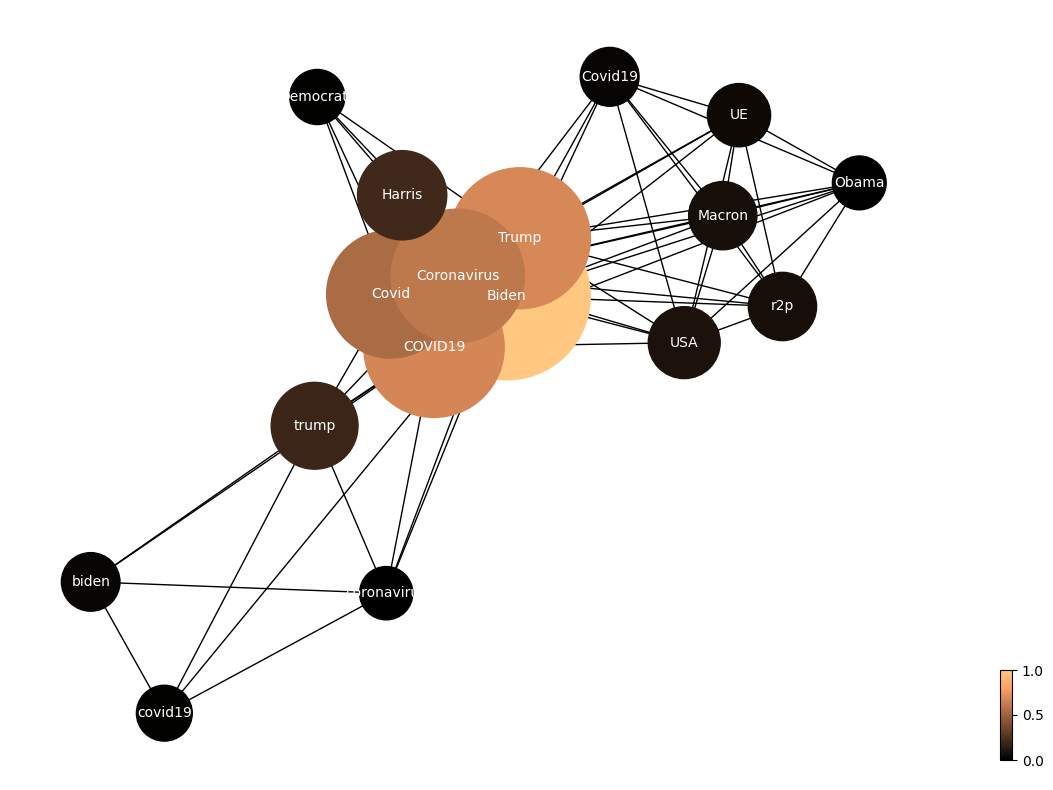

In [204]:
pr_centrality = nx.pagerank(filtered_hashGraph)
draw_centrality(filtered_hashGraph, pr_centrality, node_scale=8e4)

Top frequencies of two hashtags appearing together. Recall that in our graph, this is represented by the edge weights.

In [205]:
# Sort by weights
sorted(hashGraph.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:15]

[('Biden', 'COVID19', {'weight': 87}),
 ('Biden', 'Trump', {'weight': 84}),
 ('Biden', 'Coronavirus', {'weight': 64}),
 ('Biden', 'Covid', {'weight': 61}),
 ('COVID19', 'Covid', {'weight': 61}),
 ('COVID19', 'Coronavirus', {'weight': 60}),
 ('Covid', 'Coronavirus', {'weight': 60}),
 ('COVID19', 'Trump', {'weight': 49}),
 ('Trump', 'Coronavirus', {'weight': 46}),
 ('Trump', 'Covid', {'weight': 44}),
 ('Biden', 'Harris', {'weight': 34}),
 ('Trump', 'Harris', {'weight': 31}),
 ('Biden', 'Pandemic', {'weight': 22}),
 ('COVID19', 'Pandemic', {'weight': 22}),
 ('Trump', 'Pandemic', {'weight': 22})]